In [1]:
import glob
from pprint import pprint
import pandas as pd
import numpy as np
import json

### format data from raw text files

In [2]:
def format_email(data, fields=[
    'To', 'X-To', 'From', 'X-From', 'cc', 'X-cc', 'Subject', 'Body'
]):
    """
    Given a plain text email file, return a dictionary of key:value pairs according to 
    fields specified in function arg call
    
    :param data: str
        contents of emails from Enron corpus, access via file.read()
    :param fields: list
        list of strings from available email metadata included as plain text
    
    :return: dict
        dictionary of key:value pairs according to fields specified in args
    """
    
    d = {}

    lines = data.split('\n')
    for i in range(0, len(lines)):
        
        # header info ends with blank line
        if lines[i] != '':
            try:
                # field and value delimited with :
                key, value = lines[i].split(':', maxsplit=1)
            except:
                try:
                    # sometimes line continuations
                    value += lines[i].split('\t', maxsplit=1)[1]
                except:
                    pass
                
            # add entry to dict
            d[key] = value
        else:
            break

    
    key = 'Body'
    value = []
    # after header is text body, skip empty line
    for j in range(i+1, len(lines)):
        
        # anything below dashes are forwards/replies, don't include
        if not ((lines[j].startswith(' -----')) or 
               (lines[j].startswith('-----'))):
            
            # append each line
            value.append(lines[j])
        else: 
            break
            
    # preserve original white space
    d[key] = '\n'.join(value)

    # only return certain header info specified in function args
    return {key: d[key] for key in fields if key in d}

In [3]:
f_paths = []

# use glob to search for all sent items
for f_name in glob.glob('..\data\maildir\*\*sent*\*'):
    # some weird windows thing, the slashes are all the wrong way
    f_paths.append(f_name.replace('\\', '/'))
    
print(f'number of sent items: {len(f_paths)}')

number of sent items: 126058


In [10]:
# main invocation
emails = []
for f_path in f_paths:
    try:
        with open(f_path, 'r') as f:
            # loop through glob filepaths and append to list of dicts
            emails.append(format_email(f.read()))
    except:
        pass

print(f'emails processed: {len(emails)}')

In [7]:
emails[0]

{'To': ' christi.nicolay@enron.com, james.steffes@enron.com, jeff.dasovich@enron.com, joe.hartsoe@enron.com, mary.hain@enron.com, pallen@enron.com, pkaufma@enron.com, richard.sanders@enron.com, richard.shapiro@enron.com, stephanie.miller@enron.com, steven.kean@enron.com, susan.mara@enron.com, rebecca.cantrell@enron.com',
 'X-To': ' Christi L Nicolay, James D Steffes, Jeff Dasovich, Joe Hartsoe, Mary Hain, pallen@enron.com, pkaufma@enron.com, Richard B Sanders, Richard Shapiro, Stephanie Miller, Steven J Kean, Susan J Mara, Rebecca W Cantrell',
 'From': ' phillip.allen@enron.com',
 'X-From': ' Phillip K Allen',
 'X-cc': ' ',
 'Subject': ' ',
 'Body': 'Attached  are two files that illustrate the following:\n\nAs prices rose, supply increased and demand decreased.  Now prices are \nbeginning to fall in response these market responses. \n\n\n\n\n\n\n\n\n\n'}

In [11]:
# write to disk
df = pd.DataFrame(emails).dropna()
df.to_parquet('../data/processed/emails.parquet')

In [ ]:
pprint(emails[-3:])

In [6]:
display(df)

,To,X-To,From,X-From,X-cc,Subject,Body
0,"christi.nicolay@enron.com, james.steffes@enro...","Christi L Nicolay, James D Steffes, Jeff Daso...",phillip.allen@enron.com,Phillip K Allen,,,Attached are two files that illustrate the fo...
1,amanda.huble@enron.com,Amanda Huble,ina.rangel@enron.com,Ina Rangel,,Headcount,Financial (6)\n West Desk (14)\nMid Market ...
2,pallen70@hotmail.com,pallen70@hotmail.com,phillip.allen@enron.com,Phillip K Allen,,utilities roll,
3,ina.rangel@enron.com,Ina Rangel,phillip.allen@enron.com,Phillip K Allen,,TIME SENSITIVE: Executive Impact & Influence ...,
4,retwell@sanmarcos.net,retwell@sanmarcos.net,phillip.allen@enron.com,Phillip K Allen,,,"Larry,\n\n Just a note to touch base on the sa..."
...,...,...,...,...,...,...,...
126052,kori.loibl@enron.com,"Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",john.zufferli@enron.com,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/...",,Trade with John Lavorato,This is a trade with OIL-SPEC-HEDGE-NG (John L...
126053,john.lavorato@enron.com,"Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/...",john.zufferli@enron.com,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/...",,Gas Hedges,Some of my position is with the Alberta Term b...
126054,dawn.doucet@enron.com,"Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",john.zufferli@enron.com,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/...",,RE: CONFIDENTIAL,2\n
126055,jeanie.slone@enron.com,"Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/C...",john.zufferli@enron.com,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/...",,Calgary Analyst/Associate,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


### format data for model training

In [16]:
df = pd.read_parquet('../data/processed/emails.parquet')
df = df.dropna()

In [17]:
def format_names(x):
    return [y.split('@')[0] for y in x.strip().split(',')]

df = df.assign(recip=df['To'].apply(format_names),
               author=df['From'].apply(lambda x: x.strip().split('@')[0]))
# wish this worked
# df = df.assign(recip, author = map(lambda col: df[col].apply(format_names), ['To', 'From']))

df = df.assign(recip_primary=df['recip'].apply(lambda x: x[0]))
df[['subject', 'body']] = df[['Subject', 'Body']].apply(lambda col: col.str.strip())

In [18]:
X = df[['author', 'recip_primary', 'subject', 'body']].dropna()
X = X.replace('', np.nan).dropna()

# subset for pipeline evaluation purposes
X = X.sample(frac=.1)
X

,author,recip_primary,subject,body
42,phillip.allen,mac.d.hargrove,Re: enron close to 85,I checked into exercising options with Smith B...
13,phillip.allen,rich,Re: Western Gas Market Report -- Draft,"Richard,\n\n Compare your california productio..."
32,phillip.allen,stagecoachmama,Re: receipts,"Lucy,\n I got your email with the attachment. ..."
57,phillip.allen,barry.steinhart,Re: trading opportunities,What are your skills? Why do you want to be o...
69,phillip.allen,stagecoachmama,For Wade,"Wade,\n\n I understood your number one priorit..."


In [13]:
X['body'][:10]

79876    FYI, should we meet with this guy?  Have we do...
37967    When do we expect to hear back from NGI on the...
95379    I'm glad you had a great time.  It meant a lot...
2433     no, they were just good sellers in the cals. i...
41638    It appears our physical gas documents were ass...
1881     i think the velocity of the down move will be ...
6982     Costilla\n\n\n   \n\t\n\t\n\tFrom:  Yvette G C...
40176    Calif Senate Takes Up Bill On Deal With Small ...
68083    http://www.click2houston.com/hou/news/stories/...
14462                                     yes - let it rip
Name: body, dtype: object

In [14]:
assert X.isna().sum().sum() == 0

### assign labels

<AxesSubplot:>

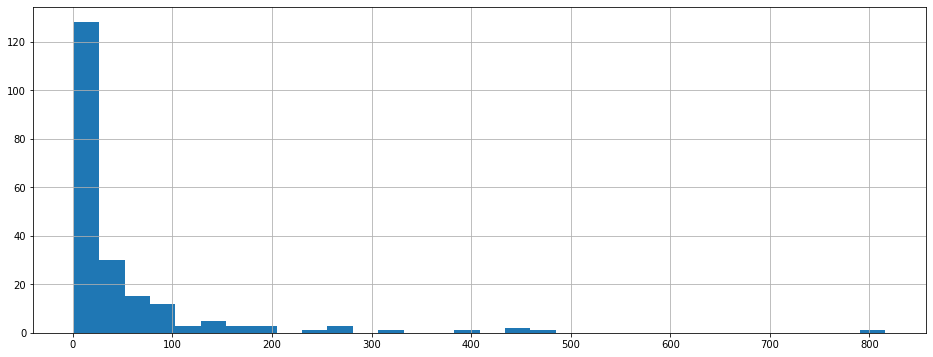

In [15]:
# pd.options.display.max_rows, pd.options.display.min_rows = 64, 16
X['author'].value_counts().hist(bins=32, figsize=(16,6))

In [16]:
vc = X['author'].value_counts()
cs = vc.cumsum() < vc.sum() * .67
authors = vc[cs]

# 33 authors account for 2/3rds of emails
print(len(authors))
authors[:8]

33


kay.mann           816
vince.kaminski     461
chris.germany      450
jeff.dasovich      446
sara.shackleton    393
tana.jones         318
sally.beck         273
eric.bass          262
Name: author, dtype: int64

In [17]:
# filter to most commonly occurring authors
mask = X['author'].apply(lambda x: x in authors.index)
X = X[mask]

In [23]:
# encode authors with numerical labels
label_dict = {}
for index, label in enumerate(authors.index):
    label_dict[label] = index

X = X.assign(label=X['author'].replace(label_dict))

In [19]:
# write train-processed data to disk
X.to_parquet('../data/processed/X.parquet')

with open('../data/processed/labels.json', 'w') as f_out:
    json.dump(label_dict, f_out)